# Programación de un robot Móvil

Esta práctica consiste en poder graficar el movimiento de un robot dado un control, haciendo uso de la cinemática directa 

Se realizarán las importaciones de las librerías necesarias para que se pueda gráficar 

In [15]:
# importar el módulo pyplot
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
from math import sin, cos
from shapely.geometry import Point, Polygon

Se crea una clase denominada Robot que será encargada de poder calcular la posición del cuerpo del robot una vez que se establecen las condiciones iniciales y un control dado

Utilizaremos matrices de transformación homogenea

La configuración del robot es
$$
   [x, y, \theta]^T
$$

Entonces la función de rotación te debe devolver 

$$
R_z(\theta) = \begin{bmatrix} 
cos \theta & - sin \theta & 0 \\
sin \theta & cos \theta  & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

y la función de traslación simplemente te devuelve

$$
T(x,y) = \begin{bmatrix} 
0 & 0 & x \\
0 & 0  & y \\
0 & 0 & 0
\end{bmatrix}
$$

Para generar una transformación usaremos

$$
H = R_z(\theta) + T(x,y)
$$

## Uso de numpy

definir una matriz en numpy

R = np.array([lista])

In [73]:
## Definir la clase Robot

class Robot():
    def __init__(self, max_dof, q_actual, polygon):
        self.max_dof = 3        # grados de libertad del robot
        self.q = q_actual  # condiciones iniciales
        self.body = polygon
        
    def getConfig():
        return q
            
    def getRotation(q):
        # Retorna la matriz de rotaciòn de acuerdo a lo visto arriba en formato array
        tetha = q[2]
        R = np.array([[cos(tetha), -sin(tetha), 0],[sin(tetha), cos(tetha),0 ],[0,0,1]])
        return R
    
    def getTranslation(q):
        # Retorna la matriz de traslacion
        x=q[0]
        y=q[1]
        T = np.array([[0, 0, x],[0, 0, y],[0,0,0]])
        return T
        
    def getHomogeneousTransform(q):
        # Retorna la matriz completa formada por la suma
        H = Robot.getRotation(q) + Robot.getTranslation(q)
        print("--------------")
        print("Esta es la matriz homogenea")
        print(H)
        print("--------------")
        return H
    
    def getTranslatedBody(puntos,q):
        # retorna un poligono transformado por q
        # para cada punto multiplicarlo por H
        lista=[]
        H = Robot.getHomogeneousTransform(q)
        for elemento in puntos:
            punto_rotado = np.dot(H,elemento)
            print(punto_rotado)
            lista.append((punto_rotado[0],punto_rotado[1]))
        return lista

In [123]:
# Generamos los vertices
p1 = (1, 0)
p2 = (0, 2)
p3 = (-1, 0)

# Crear un poligono  partir de una lista de puntos(tuplas de dos elementos)
poli = Polygon([p1,p2,p3])
x, y = poli.exterior.coords.xy
points = np.array([x, y], np.int32).T

#print(type(poli))
#print('-------')
#print(poli)
#print('-------')
#print(points)
print('-------')
print('Estos son los puntos de los vertices agregando unacolumna de ceros')
point_add=np.insert(points, points.shape[1], np.array((1, 1, 1, 1)), 1) 
print(point_add)
print('-------')
#print(point_add[0])

q = [5,5,-45]
s= Robot.getTranslatedBody(point_add, q)


def plotPolygon(polygon):
    fig, ax = plt.subplots(1)
    for element in polygon:
        x, y = element.exterior.coords.xy
        points = np.array([x, y], np.int32).T
        polygon_shape = matplotlib.patches.Polygon(points, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(polygon_shape)
        plt.axis("equal")
    plt.show()
    
#plotPolygon(poli)

-------
Estos son los puntos de los vertices agregando unacolumna de ceros
[[ 1  0  1]
 [ 0  2  1]
 [-1  0  1]
 [ 1  0  1]]
-------
--------------
Esta es la matriz homogenea
[[ 0.52532199  0.85090352  5.        ]
 [-0.85090352  0.52532199  5.        ]
 [ 0.          0.          1.        ]]
--------------
[5.52532199 4.14909648 1.        ]
[6.70180705 6.05064398 1.        ]
[4.47467801 5.85090352 1.        ]
[5.52532199 4.14909648 1.        ]


In [124]:
print(s)

[(5.52532198881773, 4.149096475465882), (6.701807049068237, 6.05064397763546), (4.47467801118227, 5.850903524534118), (5.52532198881773, 4.149096475465882)]


In [125]:

#poli2 = Polygon([s[0],s[1],s[2]])
poli2 = Polygon(s[:-1])


<class 'shapely.geometry.polygon.Polygon'>


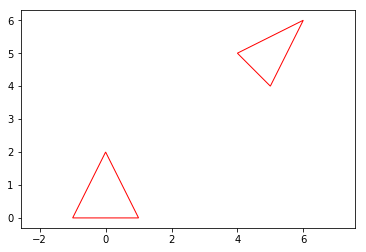

In [126]:
poligonos = [poli, poli2]
print(type(poligonos[0]))
plotPolygon(poligonos)